회귀직선
==
붓꽃 꽃잎길이 예측, 
--

몸무게 예측
--


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split


In [4]:
from sklearn import datasets 
iris = datasets.load_iris() 
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [9]:
X_all = iris.data 
X_all[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [12]:
X = X_all[:, 0] 
y = X_all[:, 2]
print(X[0:3])
print(y[0:3])

[5.1 4.9 4.7]
[1.4 1.4 1.3]


Text(0,0.5,'Petal length')

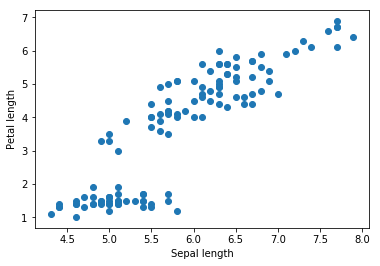

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train, marker='o') 
plt.xlabel("Sepal length") 
plt.ylabel("Petal length")

In [14]:
from sklearn.linear_model import LinearRegression 
linr = LinearRegression()
linr.fit(X_train.reshape(-1,1), y_train)
print("Score : {:.3f}".format(linr.score(X_test.reshape(-1,1), y_test)))


Score : 0.653


In [15]:
print(linr.coef_) 
print(linr.intercept_)

[1.8699969]
-7.233315234253802


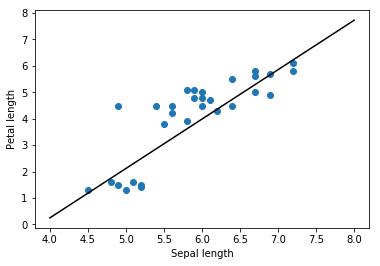

In [23]:
plt.scatter(X_test, y_test, marker='o') 
plt.xlabel("Sepal length")
plt.ylabel("Petal length")

XX = np.linspace(4, 8, 3)
plt.plot(XX, linr.coef_ * XX + linr.intercept_, "k-")

## 몸무게 예측

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split

n_samples = 1000
x1 = 3*np.random.randn(n_samples) + 170
x2 = 2*np.random.randn(n_samples) + 160

y1 = 2*x1 - 270 + 2*np.random.randn(n_samples) # 평균 70kg
y2 = 1*x2 - 100 + np.random.randn(n_samples) # 평균 60kg
plt.hist(x1, bins=30)
plt.hist(x2, bins=30)

plt.hist(y1, bins=30)
plt.hist(y2, bins=30)
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)

print(leg1.coef_)
print(leg1.score(X_test.reshape(-1,1), y_test))

[2.05018624]
0.9194348480113647


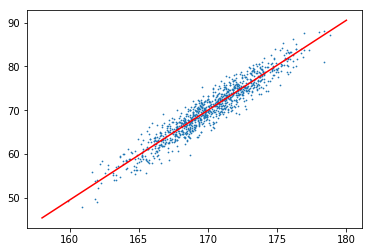

In [3]:
xs = np.linspace(158,180,3)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x1, y1, s=0.5)
plt.plot(xs, ys, c='r')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)

print(leg1.coef_)
print(leg1.intercept_)
print(leg1.score(X_test.reshape(-1,1), y_test))

[1.00059793]
-100.09123869315847
0.8017242238205649


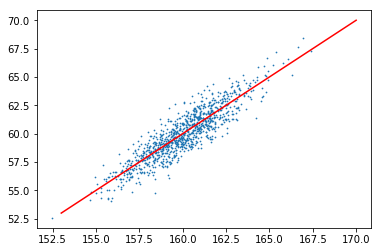

In [5]:
xs = np.linspace(153,170,3)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x2, y2, s=0.5)
plt.plot(xs, ys, c='r')

In [6]:
x = np.concatenate((x1, x2))
y = np.concatenate((y1, y2))

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)

print(leg1.coef_)
print(leg1.intercept_)
print(leg1.score(X_test.reshape(-1,1), y_test))

[1.16435866]
-127.07809008487355
0.8704439341914665


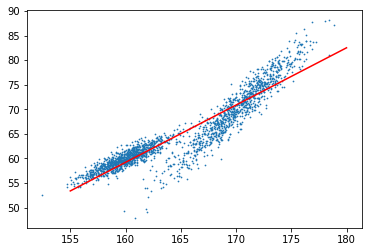

In [7]:
xs = np.linspace(155,180,3)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x,y, s=0.5)
plt.plot(xs, ys, c='r')

In [8]:
X1 = pd.DataFrame({'height':x1, 'sex':0})
X2 = pd.DataFrame({'height':x2, 'sex':1})
X = pd.concat([X1, X2], ignore_index=True)
X

,height,sex
0,173.084326,0
1,168.861708,0
2,167.760794,0
3,169.339087,0
4,172.052848,0
5,175.803012,0
6,168.313602,0
7,175.274426,0
8,168.034895,0
9,170.143020,0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
leg = LinearRegression()
leg.fit(X_train, y_train)

print(leg.coef_)
print(leg.intercept_)
print(leg.score(X_test, y_test))

[1.73720528 7.28680594]
-225.2628423752064
0.9109717703035699


In [10]:
X_train[:10]

,height,sex
1295,156.567024,1
1751,161.017749,1
1131,160.923822,1
395,169.767717,0
425,167.998359,0
12,168.647717,0
1978,159.332916,1
1806,160.763556,1
1038,157.775390,1
92,171.135175,0


## 교차검증

In [11]:
from sklearn.cross_validation import cross_val_score, KFold

/Users/hwa-jongkim/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
X.shape[1]

2

In [13]:
cross_val = KFold(X.shape[0], 10, shuffle=True)
print(cross_val_score(leg, X, y, cv=cross_val))

[0.91730411 0.92643381 0.88982475 0.92241677 0.92051448 0.92369165
 0.92280979 0.92172595 0.91799853 0.9232087 ]


## 결정트리를 이용한 회귀 (뒤에서 설명함)

In [15]:
from sklearn.tree import DecisionTreeRegressor 
dec_reg = DecisionTreeRegressor()
dec_reg.fit(X_train, y_train) 
print(dec_reg.score(X_test, y_test))

0.8837243668233168
